### Stock Prediction LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
### Here we have netflix data which, I got from kaggel.com 

In [3]:
df = pd.read_csv("NFLX.csv")

In [4]:
df

,Date,Year,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...,...
1004,1/31/2022,2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2/1/2022,2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2/2/2022,2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2/3/2022,2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
df.head()

,Date,Year,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
df.tail()

,Date,Year,Open,High,Low,Close,Adj Close,Volume
1004,1/31/2022,2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2/1/2022,2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2/2/2022,2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2/3/2022,2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2/4/2022,2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [7]:
df.describe()

,Year,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2019.595639,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,1.155997,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,2018.000000,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019.000000,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020.000000,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021.000000,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022.000000,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Year       1009 non-null   int64  
 2   Open       1009 non-null   float64
 3   High       1009 non-null   float64
 4   Low        1009 non-null   float64
 5   Close      1009 non-null   float64
 6   Adj Close  1009 non-null   float64
 7   Volume     1009 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 63.2+ KB


In [9]:
df.shape

(1009, 8)

In [10]:
## lets check the null values

In [11]:
df.isnull().sum()

Date         0
Year         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
## data visualization

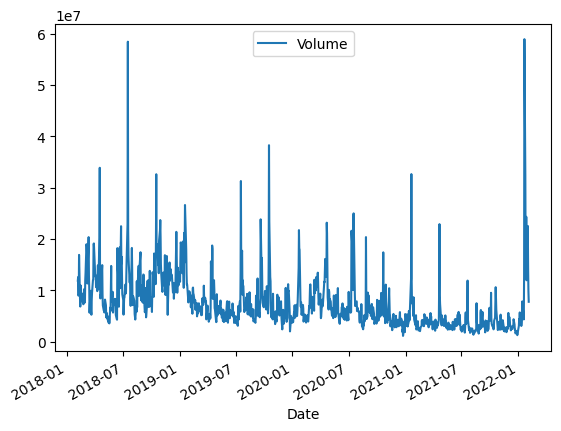

In [13]:
new_df = pd.read_csv('NFLX.csv', index_col='Date', parse_dates=True)
# Plot the line chart
new_df[[ 'Volume']].plot()

# Display the chart
plt.show()

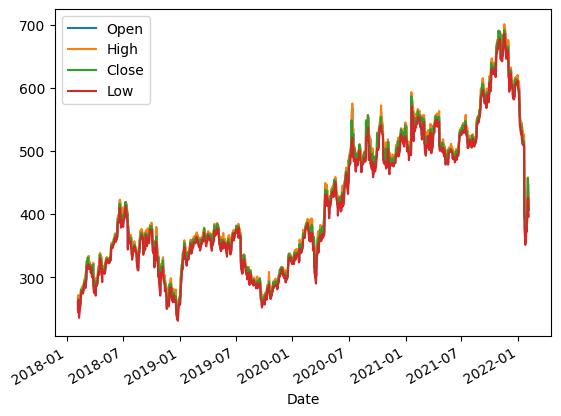

In [14]:
new_df = pd.read_csv('NFLX.csv', index_col='Date', parse_dates=True)
# Plot the line chart
new_df[[ 'Open', 'High' ,'Close','Low']].plot()

# Display the chart
plt.show()

In [15]:
close_df = new_df['Close']

In [16]:
close_df

Date
2018-02-05    254.259995
2018-02-06    265.720001
2018-02-07    264.559998
2018-02-08    250.100006
2018-02-09    249.470001
                 ...    
2022-01-31    427.140015
2022-02-01    457.130005
2022-02-02    429.480011
2022-02-03    405.600006
2022-02-04    410.170013
Name: Close, Length: 1009, dtype: float64

In [17]:
close_df.size

1009

In [18]:
close_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1009 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [19]:
close_df.describe()

count    1009.000000
mean      419.000733
std       108.289999
min       233.880005
25%       331.619995
50%       378.670013
75%       509.079987
max       691.690002
Name: Close, dtype: float64

In [20]:
close_df.mode()

0    357.320007
Name: Close, dtype: float64

In [21]:
close_df.median()

378.670013

In [22]:
close_df.reset_index()

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [23]:
close_df.shape

(1009,)

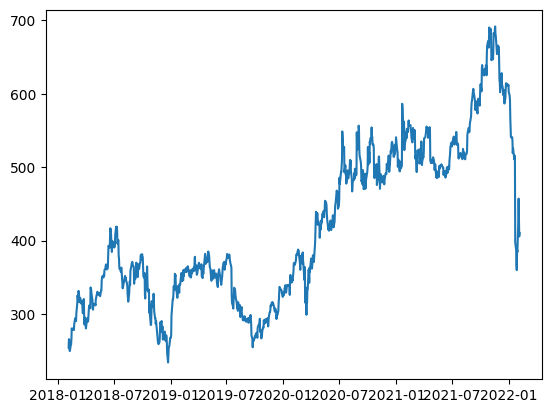

In [24]:
plt.plot(close_df)

In [25]:
### Min Max Scaler for LSTM

In [26]:
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_df=scaler.fit_transform(np.array(close_df).reshape(-1,1))

In [27]:
close_df.shape

(1009, 1)

In [28]:
close_df

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [29]:
### spliting dataset into train and test split 

In [30]:
training_size=int(len(close_df)*0.70)
test_size= len(close_df)-training_size
train_data,test_data=close_df[0:training_size,:],close_df[training_size:len(close_df),:1]
### let me explain it here here i split my data into 2 parts  one is training data or size or the another data is  tets size , so i uses the this 
### which says  that "training_size=int(len(close_df)*0.70)" it means 70 % of data will going to be my training data and restw ill be my test data


In [31]:
training_size,test_size

(706, 303)

In [32]:
close_df.size

1009

In [33]:
#converting array values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [34]:
#reshape the data into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)

In [35]:
print(X_train)

[[0.04451626 0.06954849 0.06701469 ... 0.32895744 0.36152555 0.34186674]
 [0.06954849 0.06701469 0.03542955 ... 0.36152555 0.34186674 0.35285382]
 [0.06701469 0.03542955 0.03405342 ... 0.34186674 0.35285382 0.34413837]
 ...
 [0.45765709 0.46604484 0.48308251 ... 0.5523907  0.54380637 0.53563706]
 [0.46604484 0.48308251 0.54992248 ... 0.54380637 0.53563706 0.53897906]
 [0.48308251 0.54992248 0.53080975 ... 0.53563706 0.53897906 0.54151287]]


In [36]:
print(Y_train)

[0.35285382 0.34413837 0.35888248 0.34215064 0.35934124 0.38087852
 0.40429435 0.39699876 0.40359536 0.39234616 0.35368381 0.36390644
 0.31803588 0.30853411 0.28472512 0.27777896 0.28129573 0.26963151
 0.28175442 0.28223497 0.26502258 0.22079026 0.22622924 0.22826063
 0.24162861 0.23854872 0.25565193 0.25763959 0.24842179 0.25224434
 0.24462111 0.23466065 0.22631656 0.20209255 0.19344269 0.18107948
 0.20499772 0.22747425 0.24149756 0.22998626 0.27290798 0.28548958
 0.29403024 0.29304734 0.29946923 0.29226096 0.28334899 0.23437668
 0.24590985 0.25075902 0.25016928 0.26659529 0.29721939 0.29328759
 0.28544591 0.25440685 0.29219543 0.29068825 0.28719334 0.27808479
 0.29647666 0.2960835  0.31454097 0.32072254 0.3063498  0.32229525
 0.3129246  0.31272795 0.28345818 0.25659117 0.25167646 0.26611473
 0.2009786  0.19051572 0.23083811 0.21679299 0.24577879 0.28575175
 0.24645592 0.21578823 0.20895132 0.21685852 0.14842398 0.17253881
 0.14405536 0.11131253 0.11343132 0.14831479 0.18239008 0.1643

In [37]:
### lets reshape it for LSTM which is required

In [38]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [39]:
### craeting the  LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))#input layer with 50 neurons
model.add(LSTM(50,return_sequences=True)) #hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))#output layer
model.compile(loss='mean_squared_error',optimizer='adam')



In [40]:


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')



In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs =100, batch_size = 64, verbose = 1);

Epoch 1/100
10/10 [==============================] - 12s 440ms/step - loss: 0.0452 - acc: 0.0017 - val_loss: 0.0103 - val_acc: 0.0050
Epoch 2/100
10/10 [==============================] - 3s 259ms/step - loss: 0.0082 - acc: 0.0017 - val_loss: 0.0275 - val_acc: 0.0050
Epoch 3/100
10/10 [==============================] - 3s 262ms/step - loss: 0.0053 - acc: 0.0017 - val_loss: 0.0145 - val_acc: 0.0050
Epoch 4/100
10/10 [==============================] - 3s 281ms/step - loss: 0.0041 - acc: 0.0017 - val_loss: 0.0134 - val_acc: 0.0050
Epoch 5/100
10/10 [==============================] - 3s 256ms/step - loss: 0.0034 - acc: 0.0017 - val_loss: 0.0083 - val_acc: 0.0050
Epoch 6/100
10/10 [==============================] - 3s 256ms/step - loss: 0.0031 - acc: 0.0017 - val_loss: 0.0082 - val_acc: 0.0050
Epoch 7/100
10/10 [==============================] - 3s 270ms/step - loss: 0.0028 - acc: 0.0017 - val_loss: 0.0081 - val_acc: 0.0050
Epoch 8/100
10/10 [==============================] - 2s 243ms/step -

In [ ]:
loss=model.history.history['loss']
plt.plot(loss)
plt.xlabel("No.of iteration...")
plt.ylabel("loss value...")
plt.title("variation of loss value with No. of iteration",color="Red",fontsize=16,fontweight="bold");


In [ ]:
import tensorflow as tf 

In [ ]:
tf.__version__

In [ ]:
### lest do the prediction and check performance

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### calculate RMSE(root mean squr error) performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

In [ ]:
look_back = 100

# Create empty arrays for the train, test, and predicted data
trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(new_df)
testPredictPlot[:, :] = np.nan

# Fill in the arrays with the train, test, and predicted data
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(new_df) - 1, :] = test_predict

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the train data
plt.plot(scaler.inverse_transform(new_df[:len(train_predict) + look_back]), color="blue", label="Train")

# Plot the test data
plt.plot(scaler.inverse_transform(new_df[len(train_predict) + (look_back * 2) + 1:]), color="red", label="Test")

# Plot the predicted data
plt.plot(scaler.inverse_transform(new_df), color="orange", label="Predicted")

# Add labels to the axes
plt.xlabel("Time")
plt.ylabel("Value")

# Add a title to the graph
plt.title("Train, Test, and Predicted Data")

# Change the range of the axes
plt.xlim(0, len(new_df))
plt.ylim(np.min(scaler.inverse_transform(new_df)), np.max(scaler.inverse_transform(new_df)))

# Add grid lines
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()